In [2]:
import numpy as np
from scipy import stats, optimize
import plotly.express as px

Generate Likelihood function which gives likelihood of given parameters (params) based on inpuut

In [3]:
def generate_likelihood_fn(x_values):
    def likelihood_fn(params):
        mean, standard_deviation = params[0], params[1]

        # Negative here so that when opimizer minimizes, it actually finds the maximum
        negative_log_likelihood = - \
            np.sum(stats.norm.logpdf(x_values, loc=mean, scale=standard_deviation))

        return negative_log_likelihood
    return likelihood_fn

In [4]:
num_samples = 1000
xs = np.random.normal(loc=7.0, scale=1.5, size=num_samples)
ys = np.random.normal(loc=5.0, scale=0.2, size=num_samples)

Initial guesses for the optimizer

In [8]:
guess_x = np.array([1, 1])
guess_y = np.array([1, 1])

In [9]:
xres = optimize.minimize(generate_likelihood_fn(xs), guess_x, method="Nelder-Mead", options={"disp": True})["x"]

Optimization terminated successfully.
         Current function value: 1851.691249
         Iterations: 62
         Function evaluations: 120


In [10]:
yres = optimize.minimize(generate_likelihood_fn(ys), guess_y, method="Nelder-Mead", options={"disp": True})["x"]

Optimization terminated successfully.
         Current function value: -167.051097
         Iterations: 61
         Function evaluations: 110


In [11]:
print(xres, yres)

[7.02865077 1.54153904] [4.9832134  0.20472045]


In [15]:
fig = px.scatter(x=xs, y=ys)

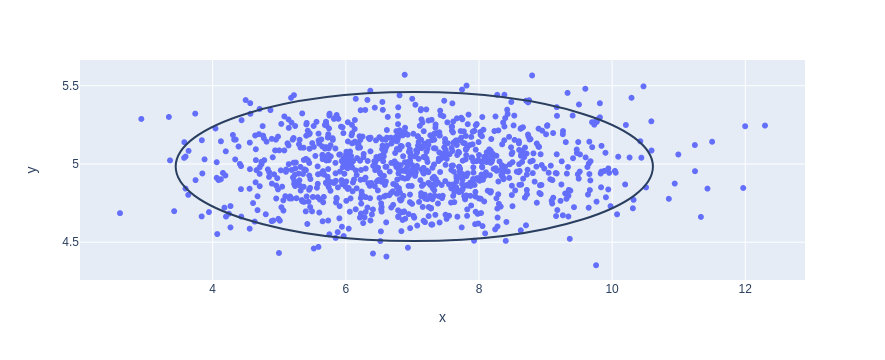

In [16]:
# How many standard deviations to get to 99th percentile?
percentile_99 = 2.3253
x_deviation = percentile_99*xres[1]
y_deviation = percentile_99*yres[1]

fig.add_shape(type="circle", xref="x", yref="y", x0=xres[0]-x_deviation, x1=xres[0]+x_deviation, y0=yres[0]-y_deviation, y1=yres[0]+y_deviation)